<a href="https://colab.research.google.com/github/itishajain15/AppliancesEnergyPrediction/blob/main/Appliances_energy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data-driven prediction of energy use of appliances.The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes(parameters).**

date time year-month-day hour:minute:second

Appliances, energy use in Wh (Dependent variable)

lights, energy use of light fixtures in the house in Wh (Drop this column)

T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius 

RH2,Humidity in living room area, in %

T3, Temperature in laundry room area

RH3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius 

RH4,Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH5, Humidity in bathroom, in % 

T6, Temperature outside the building (north side), in Celsius

RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH7, Humidity in ironing room, in % 

T8, Temperature in teenager room 2, in Celsius 

RH8,Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH9, Humidity in parents room, in % 

Tout, Temperature outside (from Chievres weather station), in
Celsius Pressure (from Chievres weather station), in mm Hg 

RHout, Humidity outside (from
Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

In [3]:
#importing the required libraries
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv("/content/drive/MyDrive/Almabetter Notes/data_application_energy.csv")

In [6]:
#making a copy of the original dataset
df1 = df.copy()

In [7]:
df1.shape

(19735, 29)

In [8]:
df1.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [9]:
df1.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [10]:
df1.sample(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
11947,2016-04-03 16:10:00,80,0,22.700000,42.466667,22.89,39.730000,22.7000,40.790,21.600000,42.000000,19.600000,48.400000,19.763333,12.600000,22.100000,37.863333,23.89,46.70,20.200000,43.500000,18.783333,750.600000,58.0,3.166667,40.000000,10.316667,18.606173,18.606173
19284,2016-05-24 15:00:00,160,0,24.426667,39.400000,24.00,37.320000,25.2900,39.090,23.926667,40.966667,23.200000,47.614000,16.650000,1.000000,23.463333,34.500000,24.50,38.79,22.700000,38.590000,14.500000,758.800000,67.0,5.000000,40.000000,8.300000,8.545046,8.545046
5282,2016-02-17 09:20:00,80,0,19.790000,34.530000,17.39,35.566667,20.2720,36.878,19.290000,33.223333,18.500000,48.745000,-4.063333,82.333333,18.290000,26.826667,20.39,36.59,17.890000,36.233333,-2.200000,762.566667,87.0,2.333333,64.333333,-4.133333,47.632182,47.632182
13242,2016-04-12 16:00:00,70,0,22.500000,41.400000,22.89,38.200000,23.2900,39.200,23.200000,38.760000,21.200000,42.942857,16.267500,2.175000,21.790000,34.826667,22.20,39.70,21.166667,41.126667,13.100000,751.600000,44.0,4.000000,40.000000,1.000000,34.364154,34.364154
7424,2016-03-03 06:20:00,40,0,20.390000,37.760000,18.60,38.730000,20.9175,39.000,19.290000,36.900000,17.963333,48.760000,3.260000,81.866667,18.390000,33.060000,20.70,46.23,18.290000,42.090000,4.100000,742.833333,85.0,5.666667,36.333333,1.800000,0.307579,0.307579


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [12]:
df1.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [13]:
df1.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [14]:
df1.duplicated(subset=None,keep='first').sum()

0


#### Feature ranges
1. Temperature : -6 to 30 deg
2. Humidity : 1 to 100 %
3. Windspeed : 0 to 14 m/s
4. Visibility : 1 to 66 km
5. Pressure : 729 to 772 mm Hg
6. Appliance Energy Usage : 10 to 1080 Wh

In [15]:
# Converting date into datetime data type.
df1['date'] = pd.to_datetime(df1['date'])

In [16]:
# Extracting month,weekday, hour from date
df1['month'] = df1.date.dt.month
df1['weekday'] = df1.date.dt.weekday
df1['hour'] = df1.date.dt.hour

In [17]:
df1.drop('date',axis = True, inplace = True)

EXPLORATORY DATA ANALYSIS

In [18]:
#log transformation of target variable
df1['log_appliances'] = np.log(df1.Appliances)

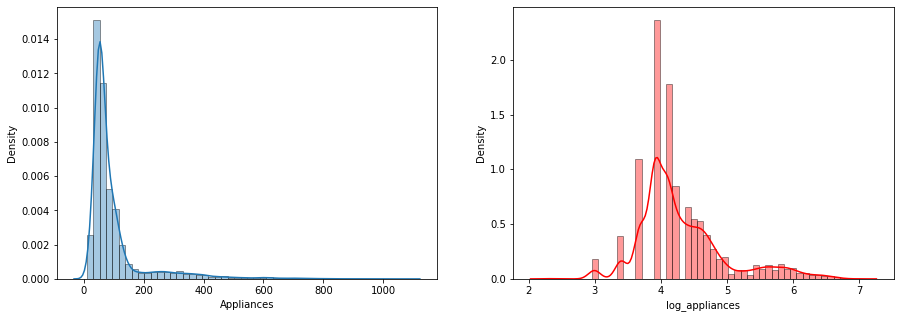

In [19]:
# Distribution plot of 'Appliances' and log transformed 'Appliances' variable.
fig, axes = plt.subplots(1, 2,figsize = (15,5))
sns.distplot(df1['Appliances'],hist = True,hist_kws={'edgecolor':'black'},ax = axes[0])
sns.distplot(df1['log_appliances'],hist = True,color = 'red', hist_kws={'edgecolor':'black'},ax = axes[1]);

From the first plot we observed that "Appliances" is positively skewed. So we used log transformation to remove the skewness. And on removal of skewness it is obseved that it follows normal distribution.

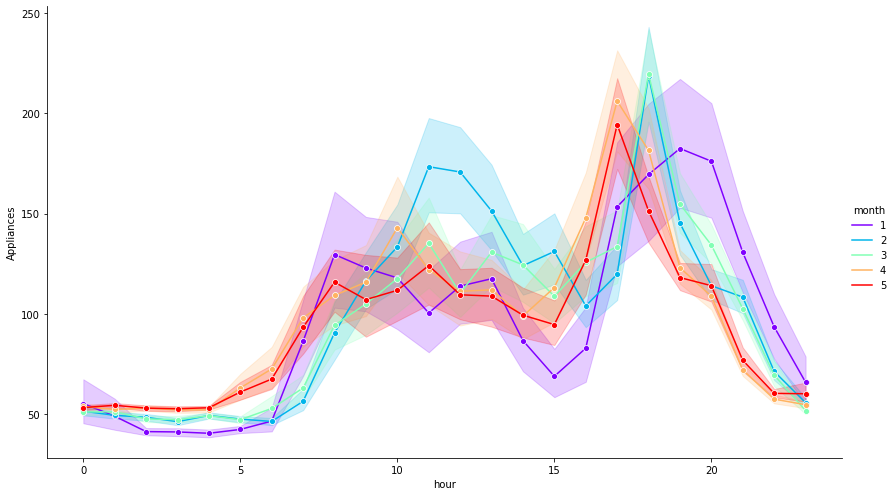

In [20]:
# Monthly Analyis of energy consumption on hourly basis
sns.relplot(y='Appliances', x='hour', data=df1, kind='line', hue='month', height=7, aspect=1.7,palette = 'rainbow',marker = 'o')
plt.show()

The dataset has observations from January to May, 2016. For all the months, the energy consumption of the appliances was at its peak for 17:00 to 19:00 hours.
Energy consumption is highest for February and March while January has the lowest.

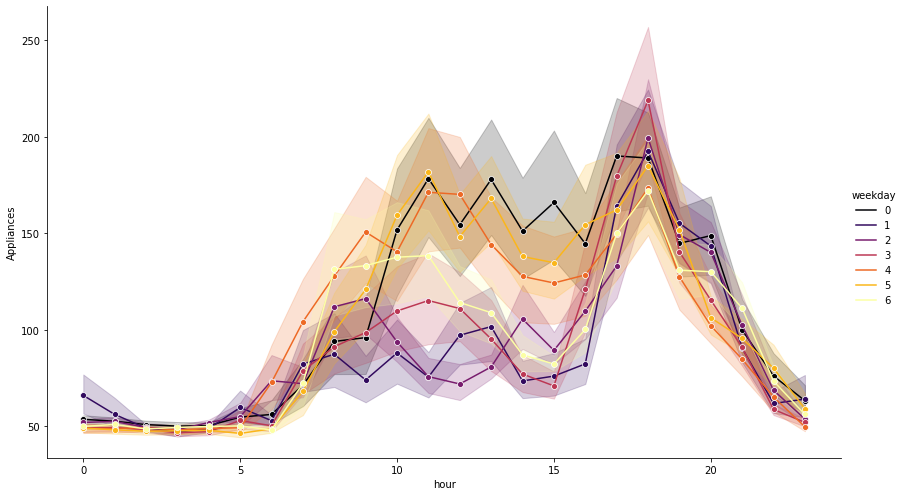

In [21]:
# lineplots for weekly analysis of energy consumption on hourly basis
sns.relplot(y='Appliances', x='hour', data=df1, kind='line', hue='weekday', height=7, aspect=1.7, marker = 'o', palette='inferno')
plt.show()

The energy consumption for each day of the week is at its highest during hours between 4 pm to 8 pm while it is at its lowest between 12 am to 5 am . For other times of the day it doesn’t follow a general trend, it differs from day to day.


In [22]:
df1['Temperature_total'] = df1['T1'] + df1['T2'] + df1['T3'] + df1['T4'] + df1['T5'] + df1['T6'] + df1['T7'] + df1['T8'] + df1['T9']+df1['T_out']
df1['Humidity_total'] = df1['RH_1'] + df1['RH_2'] + df1['RH_3'] + df1['RH_4'] + df1['RH_5'] + df1['RH_6'] + df1['RH_7'] + df1['RH_8'] + df1['RH_9']+df1['RH_out']
aa=df1.groupby('month')[('Temperature_total','Humidity_total','Appliances')].mean()
aa

,Temperature_total,Humidity_total,Appliances
month,,,
1,156.294533,533.041913,97.026010
2,169.502877,505.903780,100.945881
3,173.496385,447.199099,96.953405
4,188.422765,430.001035,98.888889
5,216.908728,424.501057,94.199325


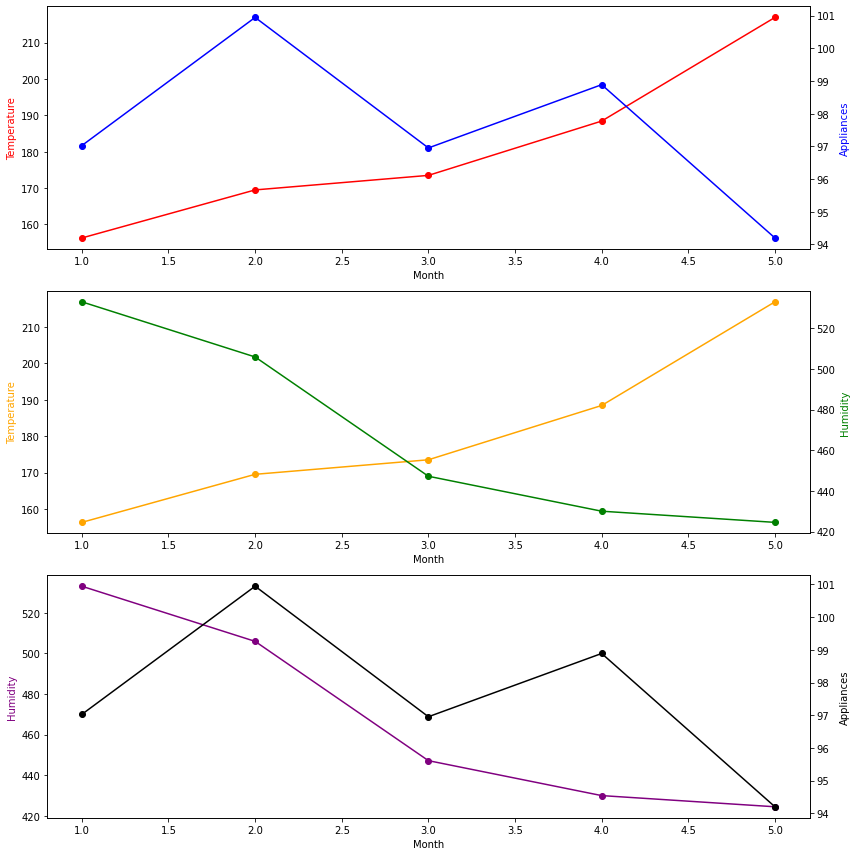

In [23]:
# Multivariate Analysis of variables using lineplots
plt.rcParams["figure.figsize"] = [12, 12]
plt.rcParams["figure.autolayout"] = True

ax0 = plt.subplot(311)
ax1 = ax0.twinx() # Create a twin of Axes with a shared x-axis but independent y-axis.
ax2 = plt.subplot(312)
ax3 = ax2.twinx() # Create a twin of Axes with a shared x-axis but independent y-axis.
ax4 = plt.subplot(313)
ax5 = ax4.twinx() # Create a twin of Axes with a shared x-axis but independent y-axis.
ax0.get_shared_x_axes().join(ax0, ax1)
ax2.get_shared_x_axes().join(ax2, ax3)
ax4.get_shared_x_axes().join(ax4, ax5)
ax0.set_xlabel('Month',color='Black')
ax2.set_xlabel('Month',color='Black')
ax4.set_xlabel('Month',color='Black')
c1, = ax0.plot(aa.index ,aa.Temperature_total, color="red", marker="o")
ax0.set_ylabel('Temperature',color='Red')
c2, = ax1.plot(aa.index,aa.Appliances,color="blue",marker="o")
ax1.set_ylabel('Appliances',color="blue")
c3, = ax2.plot(aa.index ,aa.Temperature_total, color="orange", marker="o",label='Temperature')
ax2.set_ylabel('Temperature',color="orange")
c4, = ax3.plot(aa.index,aa.Humidity_total,color="green",marker="o",label='Humidity')
ax3.set_ylabel('Humidity',color="green")
c5, = ax4.plot(aa.index,aa.Humidity_total,color="purple",marker="o")
ax4.set_ylabel('Humidity',color="purple")
c6, = ax5.plot(aa.index,aa.Appliances,color="black",marker="o")
ax5.set_ylabel('Appliances',color="black")
plt.show()

1. As Temperature increases, energy consumption of the Appliances increases from Jan-Feb and March-April. And consumption decreases with increase in temperature for months Feb-March and April-May.
2. Temperature increases and humidity decreses as we move from January to May.
3. As humidity decreases, energy consumption of the Appliances increases from Jan-Feb and March-April. And consumption decreases with decrease in humidity for months Feb-March and April-May

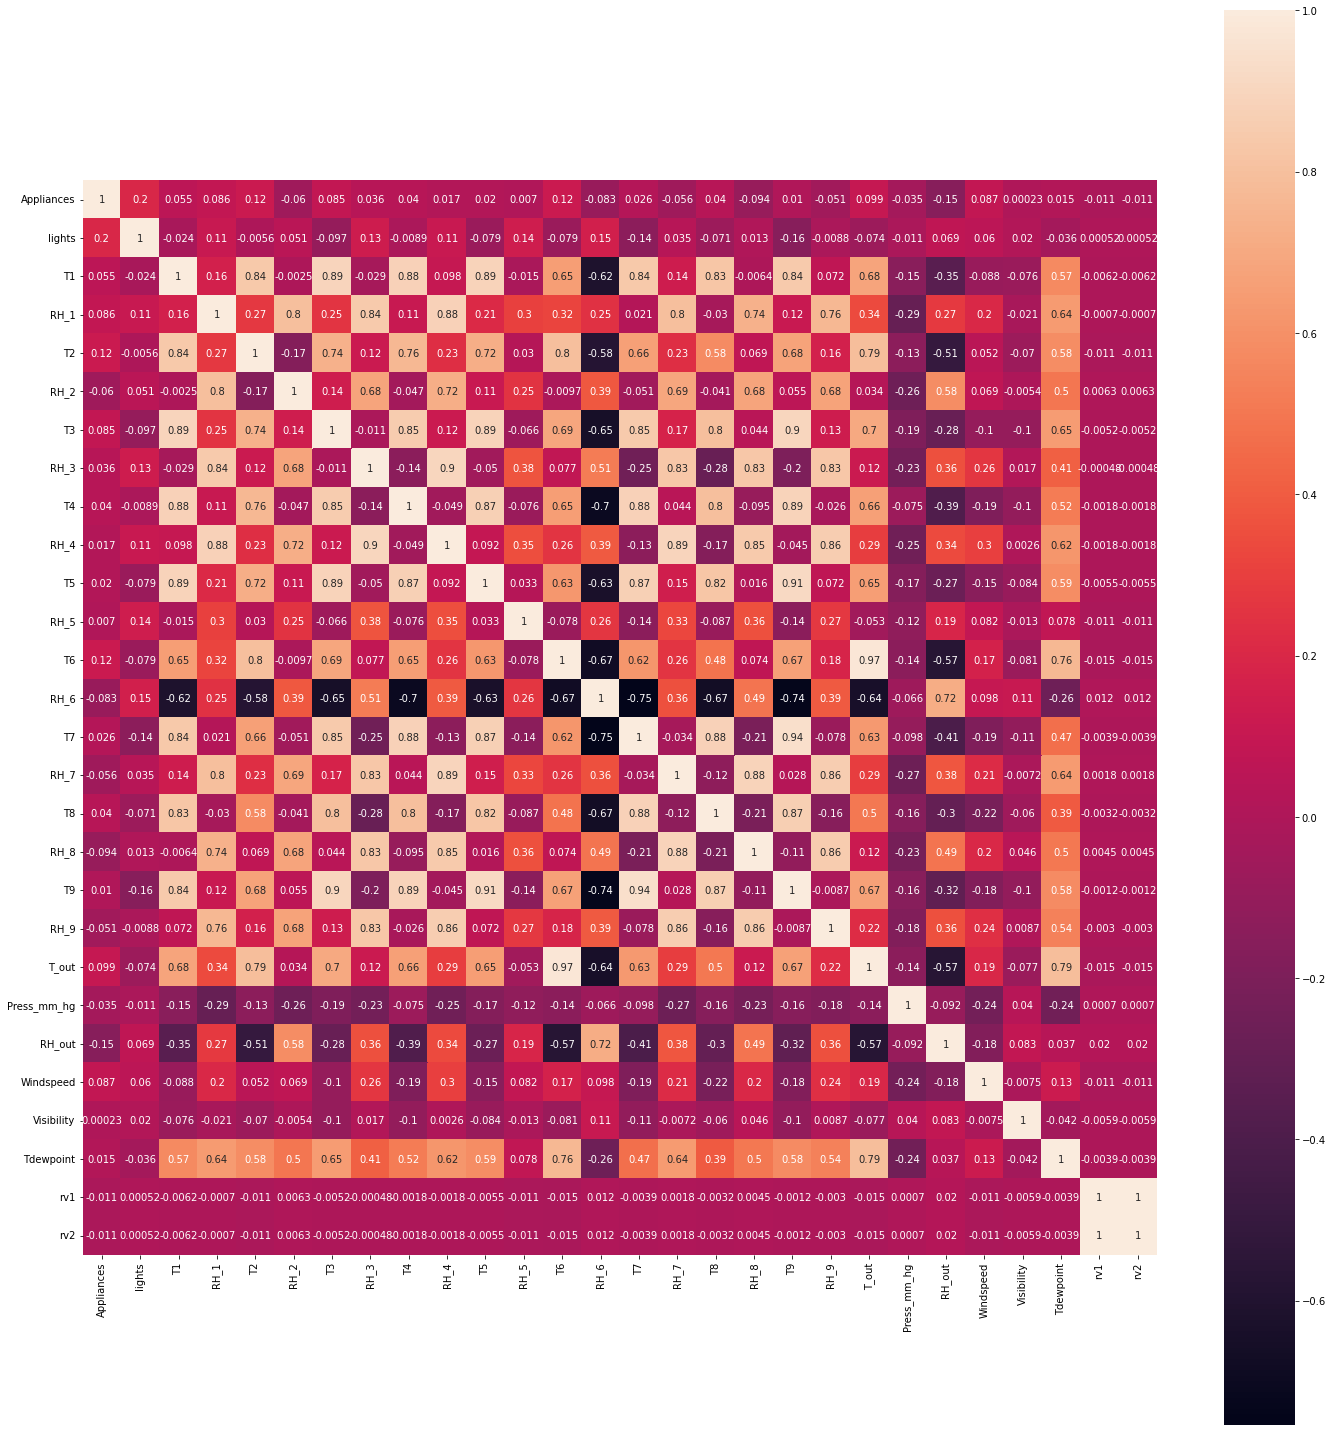

In [24]:
# Heatmap without log transformation on target variable
corr_matrix = df.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, square=True);

In [25]:

data_log_transformed = df1.drop(columns = 'Appliances', axis = 1)

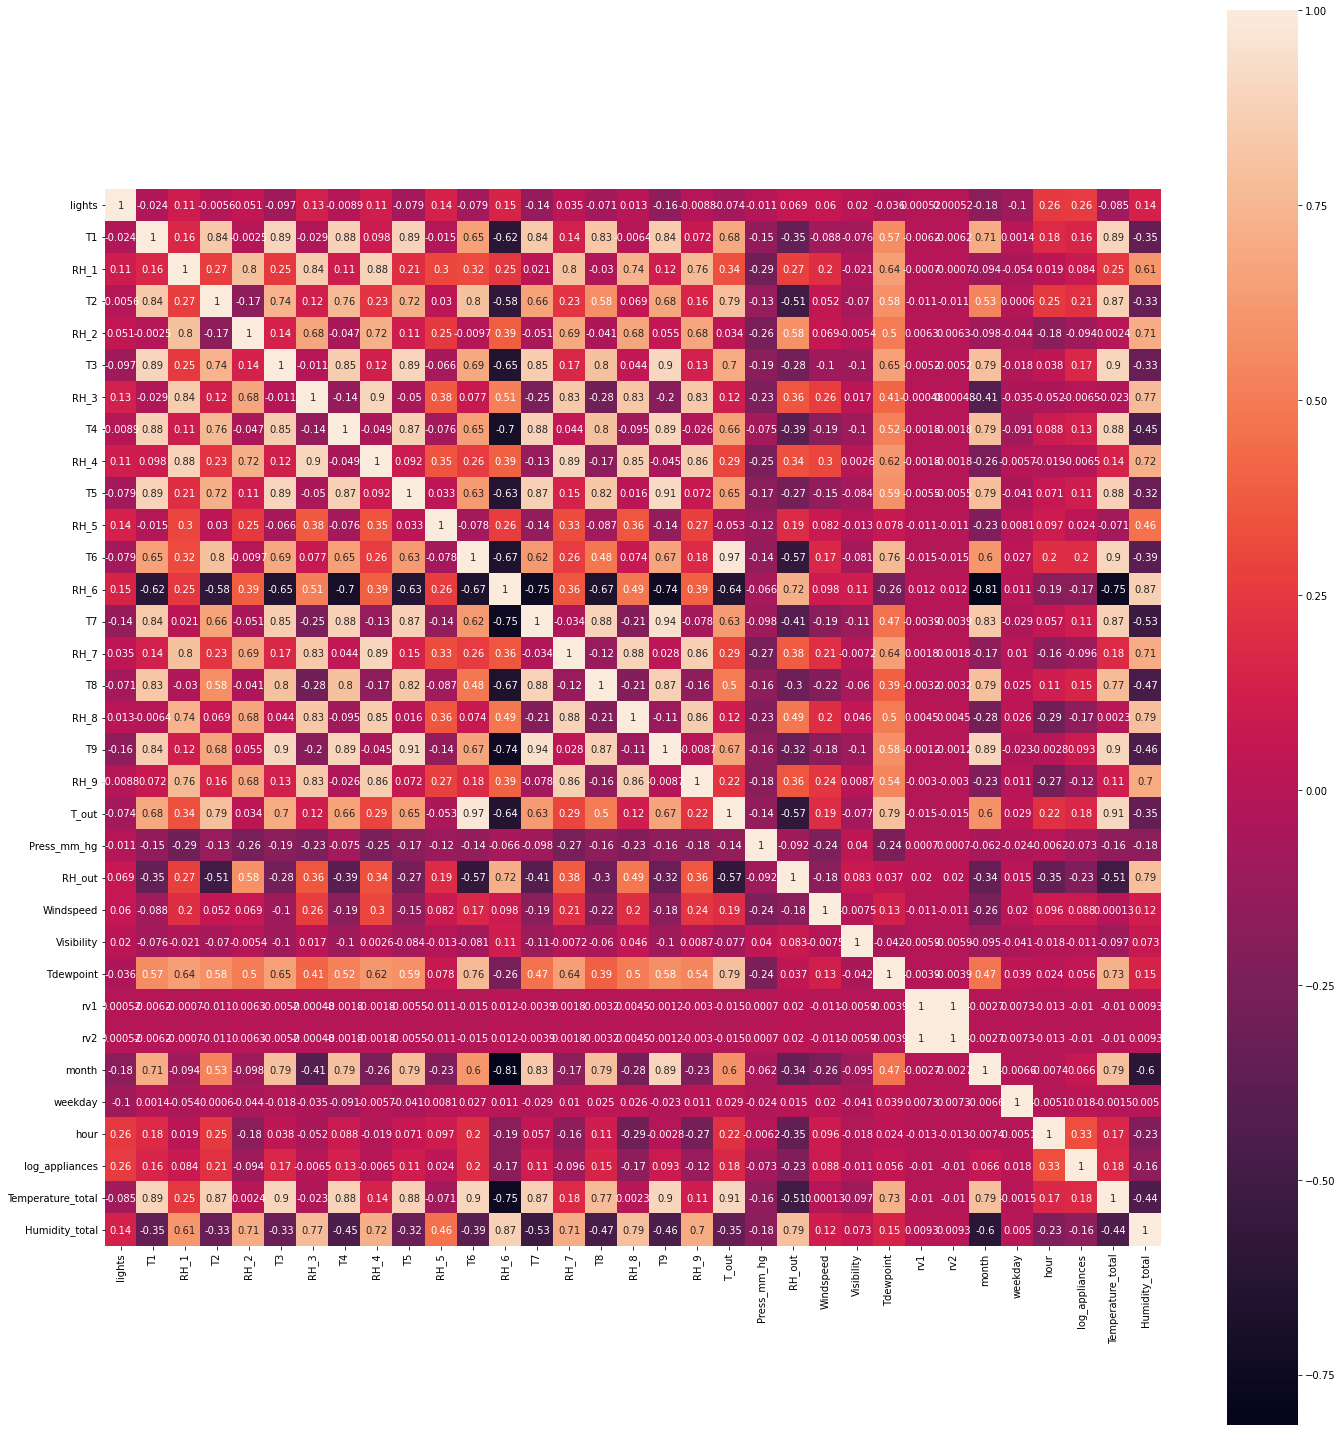

In [26]:
# Heatmap with log transformation on target variable

corr_matrix_transformed = data_log_transformed.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix_transformed, annot=True, square=True);

Log Tranformed Appliances column tend to show better correlation with the rest of the features.

# build a prelimenary regression model

In [27]:
#Defining the dependent and independent variables
X = df1.drop(['Appliances', 'log_appliances'], axis =1)
y = df1['Appliances']

#format data part1 : split the data into dependent and independent data variables

In [28]:
#Splitting into train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [29]:
models = [["Linear",LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['ElasticNet: ', ElasticNet(random_state=0)],
           ['DecisionTreeRegresson: ', DecisionTreeRegressor()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegresspr: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()]
             
         ]

In [30]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Percentage Train_R2_Score in %"] = (metrics.r2_score(y_train,curr_model.predict(X_train)))*100
    curr_model_data["Percentage Test_R2_Score in %"] = (metrics.r2_score(y_test,curr_model.predict(X_test)))*100
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    curr_model_data["adj_r2"] = 1 - ((1 - curr_model_data["Percentage Test_R2_Score in %"]) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))    
 
    model_data.append(curr_model_data)

[06:17:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [31]:
model_data

[{'Name': 'Linear',
  'Percentage Test_R2_Score in %': 17.070992647435013,
  'Percentage Train_R2_Score in %': 16.89436423561007,
  'Test_RMSE_Score': 91.09764711106938,
  'Train_Time': 0.03077101707458496,
  'adj_r2': 17.20238553571246},
 {'Name': 'Lasso: ',
  'Percentage Test_R2_Score in %': 16.85551101870346,
  'Percentage Train_R2_Score in %': 16.543523506335433,
  'Test_RMSE_Score': 91.2159237855489,
  'Train_Time': 0.8633043766021729,
  'adj_r2': 16.98514217675111},
 {'Name': 'Ridge: ',
  'Percentage Test_R2_Score in %': 17.079816770083557,
  'Percentage Train_R2_Score in %': 16.897675168479587,
  'Test_RMSE_Score': 91.09280032571858,
  'Train_Time': 0.009852409362792969,
  'adj_r2': 17.211281802439885},
 {'Name': 'ElasticNet: ',
  'Percentage Test_R2_Score in %': 15.41593582424392,
  'Percentage Train_R2_Score in %': 14.7600380378077,
  'Test_RMSE_Score': 92.002197545103,
  'Train_Time': 0.5008544921875,
  'adj_r2': 15.533797333282195},
 {'Name': 'DecisionTreeRegresson: ',
  'Pe

In [32]:
result_df = pd.DataFrame(model_data)
result_df

,Name,Train_Time,Percentage Train_R2_Score in %,Percentage Test_R2_Score in %,Test_RMSE_Score,adj_r2
0,Linear,0.030771,16.894364,17.070993,91.097647,17.202386
1,Lasso:,0.863304,16.543524,16.855511,91.215924,16.985142
2,Ridge:,0.009852,16.897675,17.079817,91.092800,17.211282
3,ElasticNet:,0.500854,14.760038,15.415936,92.002198,15.533797
4,DecisionTreeRegresson:,0.675157,100.000000,22.190721,88.240837,22.363972
5,KNeighborsRegressor:,0.003566,53.332147,24.210247,87.088172,24.400009
6,SVR:,19.130457,-9.938475,-9.513205,104.685654,-9.599158
7,RandomForest,37.711187,93.529486,54.310543,67.617938,54.746398
8,ExtraTreeRegressor :,10.367579,100.000000,61.319399,62.215778,61.812557
9,GradientBoostingRegresspr:,10.185507,37.177282,30.778013,83.229245,31.021472


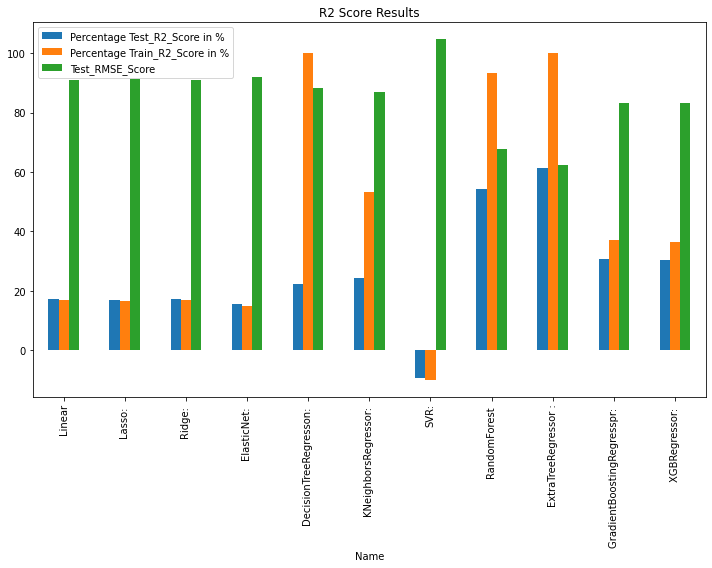

In [33]:
result_df.plot(x="Name", y=['Percentage Test_R2_Score in %' , 'Percentage Train_R2_Score in %' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

# hyperparameter tunning for base model

In [36]:
param_grid = [{
               'max_depth': [80, 150, 200,250],
               'n_estimators' : [100,150,200,250],
               'max_features': ["auto", "sqrt", "log2"],
             }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [37]:
reg=ExtraTreesRegressor(random_state=40,max_depth=50,max_features='sqrt',n_estimators=250,criterion='friedman_mse')
reg.fit(X_train,y_train)

ExtraTreesRegressor(criterion='friedman_mse', max_depth=50, max_features='sqrt',
                    n_estimators=250, random_state=40)

In [38]:
y_pred = reg.predict(X_test)

In [39]:
#Testing the performance of the model using different evaluation metrics
reg_model_data={}
reg_model_data["Train_R2_Score"] = metrics.r2_score(y_train,reg.predict(X_train))
reg_model_data["Test_R2_Score"] = metrics.r2_score(y_test,reg.predict(X_test))
reg_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,reg.predict(X_test)))
reg_model_data["Mean Absolute Error"]=mean_absolute_error(y_test,y_pred)
reg_model_data["Mean Squared Error"]=mean_squared_error(y_test,y_pred)
reg_model_data["adj_r2"] = 1 - ((1 - reg_model_data["Test_R2_Score"]) * (len(y_test) - 1) / (len(y_test) - 24 - 1))
reg_model_data["RMSLE"]=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
reg_model_data['MAPE'] = mean_absolute_percentage_error(y_test, y_pred)
reg_model_data["adj_r2"] = 1 - ((1 - reg_model_data["Test_R2_Score"]) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

In [40]:
reg_model_data

{'MAPE': 0.27001239849551223,
 'Mean Absolute Error': 27.298413985305295,
 'Mean Squared Error': 3480.362888674943,
 'RMSLE': 4.077445922843389,
 'Test_R2_Score': 0.6522103320574387,
 'Test_RMSE_Score': 58.99460050441009,
 'Train_R2_Score': 1.0,
 'adj_r2': 0.6493668805055323}